<a href="https://colab.research.google.com/github/aeshwin10/Basic-ML-Models/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Loading necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model



In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train, x_val = x_train[:-10000], x_train[-10000:]

#Normalization - Image data often comes in the form of integers in the range [0, 255]. Here, we are normalizing it into [0,1]
#Helps in better efficiency and computation
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)
print (x_val.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


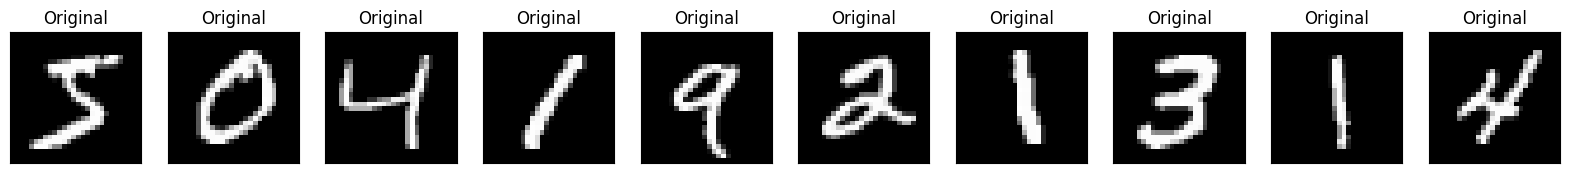

In [10]:
#Visualizing the image
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
    plt.title("Original")



In [14]:
#Defining the architecture of the AutoEncoder

latent_dim = 64 #8*8 from 24*24=784

class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation = 'sigmoid'),
        layers.Reshape((28,28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)



In [15]:
autoencoder.compile(optimizer = 'adam', loss=losses.MeanSquaredError())

In [17]:
#training the model
autoencoder.fit(x_train, x_train,
                epochs = 10,
                shuffle=True,
                validation_data =(x_val, x_val))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0474 - val_loss: 0.0111
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0093 - val_loss: 0.0062
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0041 - val_loss: 0.0042


In [18]:
print(autoencoder.encoder.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
print(autoencoder.decoder.summary())


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 784)                 │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,960 (199.06 KB)

 Trainable params: 50,960 (199.06 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:

encoded_images = autoencoder.encoder(x_test).numpy()
decoded_images = autoencoder.decoder(encoded_images).numpy()

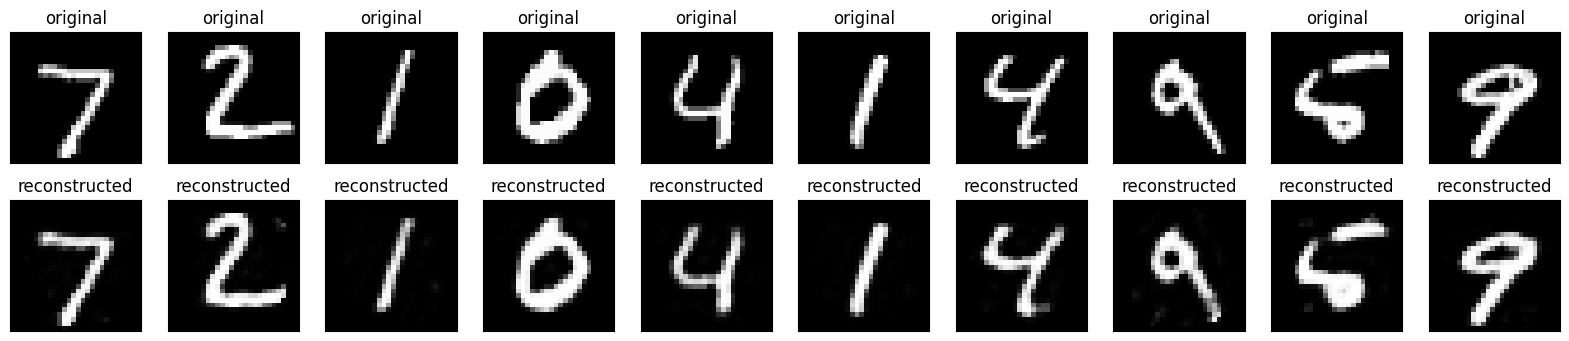

In [25]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("original")

    #display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_images[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()